In [1]:
import mujoco
import mediapy as media

model = mujoco.MjModel.from_xml_path("../robot_models/kuka_iiwa/scene.xml")
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)


""

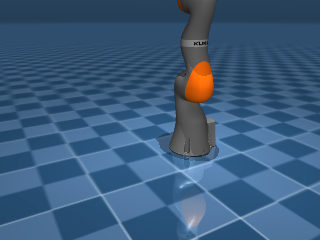

In [2]:
mujoco.mj_forward(model, data)
renderer.update_scene(data)
media.show_image(renderer.render())

In [9]:
print(data.cvel)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [10]:
mujoco.mj_step(model, data)

# Collect data
output_data = []
for i in range(model.nbody):
    link_name = model.body(i).name
    parent_id = model.body_parentid[i]
    parent_name = model.body(parent_id).name if parent_id != -1 else "None"

    # Extract position and velocity
    pos = data.xpos[i]  # Global (x, y, z) position
    vel = data.cvel[i][:3]  # Local (x, y, z) velocity

    output_data.append([
        1,  # Assuming 'Frame' is always 1 in the given format
        link_name,
        parent_name,
        pos[0], 0, vel[0],  # X components
        pos[1], 0, vel[1],  # Y components
        pos[2], 0, vel[2]   # Z components
    ])


In [12]:
import pandas as pd
columns = ["Frame", "Link", "Parent", "X_Position", "X_Rotation", "X_Velocity",
           "Y_Position", "Y_Rotation", "Y_Velocity", "Z_Position", "Z_Rotation", "Z_Velocity"]

df = pd.DataFrame(output_data, columns=columns)

In [13]:
df.head()

,Frame,Link,Parent,X_Position,X_Rotation,X_Velocity,Y_Position,Y_Rotation,Y_Velocity,Z_Position,Z_Rotation,Z_Velocity
0,1,world,world,0.0,0,0.0,0.0,0,0.0,0.0000,0,0.0
1,1,base,world,0.0,0,0.0,0.0,0,0.0,0.0000,0,0.0
2,1,link1,base,0.0,0,0.0,0.0,0,0.0,0.1575,0,0.0
3,1,link2,link1,0.0,0,0.0,0.0,0,0.0,0.3600,0,0.0
4,1,link3,link2,0.0,0,0.0,0.0,0,0.0,0.5645,0,0.0


In [14]:
[print(model.body(i).name) for i in range(model.nbody)]

world
base
link1
link2
link3
link4
link5
link6
link7


[None, None, None, None, None, None, None, None, None]

In [15]:
data.qpos

array([ 1.29587779e-09, -2.50854156e-08,  2.41126456e-09, -2.65911264e-08,
        1.70224507e-09,  2.84170280e-09, -1.34897442e-11])

In [16]:
data.xpos

array([[0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.1575],
       [0.    , 0.    , 0.36  ],
       [0.    , 0.    , 0.5645],
       [0.    , 0.    , 0.78  ],
       [0.    , 0.    , 0.9645],
       [0.    , 0.    , 1.18  ],
       [0.    , 0.    , 1.261 ]])